***
Welcome! 

In this notebook we are going to explore the concept of `representing sentences` as vectors, for example characterizing a set of tweets.
<br>
This is a meaningful technique for text classification problems and to translate our documents into a mathematical representation.
<br>
***

***
In the past, we have looked to words as vectors to convey the meaning of words. A lot of times we want to consider whole sentences as vectors - there are some theories behind transforming word to document vectors but that compound on some kind of "error" as the word embeddings are already compressed representations of the words.
<br>
<br>
In this notebook, we'll explore 4 different text-to-vector approaches: 
* One-hot vectorizer.
* Count vectorizer.
* TF-IDF.
* DocVectors.
<br>
<br>
Let's explore them!
***

In [42]:
# Import our libraries
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Check maximum columns
pd.set_option('display.max_columns', 100)

Let's start by loading our tweets data that contain specific sentences about natural disasters (https://www.kaggle.com/c/nlp-getting-started).
<br>
<br>

In [3]:
tweets = pd.read_csv('./data/tweets_data.csv')

**How can we represent these sentences as features for a model?**

Let's look at the first set of tweets we see in our data:

In [4]:
tweets.text.head(5)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

## 1.1 - Binary Vectorizer (One-Hot Vectorizer)

The column text is the column that we want to target.
<br>
<br>
A straightforward method to numerically represent these 5 tweets is by using a one-hot vector. Here, the vocabulary is arranged in order, and columns corresponding to present words are set to 1, while those for absent words are set to 0. Let's examine the 2nd and 6th tweets for clarity:

In [9]:
print('First Tweet: '+tweets.text[1]+'\n')
print('Second Tweet: '+tweets.text[5])

First Tweet: Forest fire near La Ronge Sask. Canada

Second Tweet: #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires


Let us build the vocab for both the tweets - I'll use whitespace tokenization for simplification:

In [10]:
vocab = set((tweets.text[1] + ' ' + tweets.text[5]).split(' '))

This is our full vocab for both tweets - we can build an array of the size of the **vocab**:

In [11]:
vocab

{'#CAfire',
 '#RockyFire',
 '#wildfires',
 '-',
 '20',
 '=>',
 'California',
 'Canada',
 'County',
 'Forest',
 'Hwy.',
 'La',
 'Lake',
 'Ronge',
 'Sask.',
 'Update',
 'both',
 'closed',
 'directions',
 'due',
 'fire',
 'in',
 'near',
 'to'}

In [12]:
np.zeros([1, len(vocab)])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

Seeing this in `DataFrame` format and checking the name for each column in our array:

In [13]:
sorted_vocab = list(vocab)
sorted_vocab.sort()

pd.DataFrame(np.zeros([2, len(vocab)]), columns=sorted_vocab)

,#CAfire,#RockyFire,#wildfires,-,20,=>,California,Canada,County,Forest,Hwy.,La,Lake,Ronge,Sask.,Update,both,closed,directions,due,fire,in,near,to
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have two rows, one for each tweet in our example. The easiest thing to do is to consider 1 where the word $i$ is present in tweet $j$ and 0 otherwise.

A very manual thing to do is to change the columns one-by-one (just for exemplification):

In [14]:
array_word_1 = np.zeros([1, len(vocab)])
array_word_1[:,7] = 1
array_word_1[:,9] = 1
array_word_1[:,11] = 1
array_word_1[:,13] = 1
array_word_1[:,14] = 1
array_word_1[:,20] = 1
array_word_1[:,22] = 1

For our tweet: ```Forest fire near La Ronge Sask. Canada``` the array would have the following look:

In [15]:
pd.DataFrame(array_word_1, columns=sorted_vocab)

,#CAfire,#RockyFire,#wildfires,-,20,=>,California,Canada,County,Forest,Hwy.,La,Lake,Ronge,Sask.,Update,both,closed,directions,due,fire,in,near,to
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


For the other tweet ```#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires``` the array would have the following look:

In [16]:
array_word_2 = np.where(array_word_1 == 1, 0, 1)
array_word_2[:,20] = 1

pd.DataFrame(array_word_2, columns=sorted_vocab)

,#CAfire,#RockyFire,#wildfires,-,20,=>,California,Canada,County,Forest,Hwy.,La,Lake,Ronge,Sask.,Update,both,closed,directions,due,fire,in,near,to
0,1,1,1,1,1,1,1,0,1,0,1,0,1,0,0,1,1,1,1,1,1,1,0,1


Seeing the two rows in DataFrame format:

In [17]:
pd.DataFrame(np.vstack([array_word_1,array_word_2]), columns=sorted_vocab)

,#CAfire,#RockyFire,#wildfires,-,20,=>,California,Canada,County,Forest,Hwy.,La,Lake,Ronge,Sask.,Update,both,closed,directions,due,fire,in,near,to
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


Notice how the only column that has the value 1 for both rows is the column ```fire```, the word that is present in both tweets!
<br>
<br>
With this technique, the number of times a specific word appears on a text does not matter - if a word should appear twice on a specific tweet we would still mark it as one.
<br>
<br>
Luckily, we don't have to do this by hand for every tweet! Let's see the CountVectorizer function that helps us build this array - Exemplifying this for the first 10 tweets:

In [18]:
cv = CountVectorizer(binary=True)

In [19]:
cv.fit_transform(tweets.text.head(10))

<10x98 sparse matrix of type '<class 'numpy.int64'>'
	with 122 stored elements in Compressed Sparse Row format>

As the vocab gets large (and that happens very fast when we add more tweets), CountVectorizer stores the values in Sparse Matrix format (a compressed format) - but we can transform the values to array and then to dataframe:

In [24]:
sparse_binary = cv.fit_transform(tweets.text.head(10))

pd.DataFrame(sparse_binary.todense(), columns=cv.get_feature_names_out())

,000,13,20,across,afraid,alaska,all,allah,an,and,are,area,areas,as,asked,being,both,building,by,cafire,california,can,canada,causes,closed,colorado,coming,county,deeds,directions,disaster,due,earthquake,emergency,evacuation,expected,fire,flash,flood,flooding,forest,forgive,from,got,happening,heavy,hill,hwy,in,into,is,just,la,lake,manitou,may,near,no,notified,now,of,officers,on,or,orders,other,our,people,photo,place,pours,rain,reason,receive,residents,rockyfire,ronge,ruby,sask,school,see,sent,shelter,smoke,springs,street,streets,that,the,there,this,to,top,tornado,update,us,wildfires,woods
0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
8,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0


Some pre-processing is already applied by the default arguments (for example, lower casing) of the CountVectorizer - they are available here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

The vectors above have high dimension just for 10 tweets - let's check the number of columns:

In [23]:
pd.DataFrame(sparse_binary.todense(), columns=cv.get_feature_names_out()).shape

(10, 98)

98 columns, just for 10 tweets - let's check the dimensions for 100 tweets:

In [26]:
sparse_binary = cv.fit_transform(tweets.text.head(100))

pd.DataFrame(sparse_binary.todense(), columns=cv.get_feature_names_out()).shape

(100, 671)

For 100 tweets, our dataframe has 671 columns - this number can get really large, really fast. One way to go around this is to use one argument in the CountVectorizer called `min_df` - it filters out rare terms that do not show up in more than x% in our documents (in this case, our tweets):

In [27]:
# Limiting for 5%
cv_limit = CountVectorizer(binary=True, min_df=0.05)

In [29]:
sparse_binary_limit = cv_limit.fit_transform(tweets.text.head(100))
pd.DataFrame(sparse_binary_limit.todense(), columns=cv_limit.get_feature_names_out()).shape

(100, 31)

Now the same tweets only generate 31 columns but be wary that using a threshold to remove rare words will cause information loss.

Let us generate our vectorizer for the entire Tweet Base with a threshold of 1%:

In [30]:
# Limiting for 1%
cv_final = CountVectorizer(binary=True, min_df=0.01)
sparse_binary = cv_final.fit_transform(tweets.text)

In [31]:
pd.DataFrame(sparse_binary.todense(), columns=cv_final.get_feature_names_out()).shape

(7613, 150)

This method generated about 150 columns - we will use similar format for the text classification tasks we will do in the future:

In [33]:
pd.DataFrame(sparse_binary.todense(), columns=cv_final.get_feature_names_out())

,2015,about,accident,after,all,amp,an,and,are,as,at,attack,back,be,been,being,body,bomb,buildings,burning,but,by,california,can,car,co,could,crash,day,dead,did,disaster,do,don,down,emergency,fire,fires,first,for,from,full,get,go,going,good,got,had,has,have,...,say,see,she,so,some,still,storm,suicide,than,that,the,their,them,then,there,they,think,this,time,to,today,too,train,two,up,us,via,video,want,war,was,watch,way,we,were,what,when,who,why,will,with,world,would,year,years,you,your,youtube,û_,ûªs
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


The `one-hot vectorizer` has many disadvantages, namely: 
* Doesn't consider frequency of the words.
* Scales very badly for a large corpus.

## 1.2 - Count Vectorizer

To do a pure **Count** vectorizer, we just have to tweak a parameter of the ```CountVectorizer``` object:

In [34]:
# Limiting for 5%
cv_count = CountVectorizer(binary=False, min_df=0.05)

In [35]:
sparse_count = cv_count.fit_transform(tweets.text)

In [37]:
pd.DataFrame(sparse_count.todense(), columns=cv_count.get_feature_names_out())

,and,at,be,by,co,for,from,http,https,in,is,it,my,of,on,that,the,this,to,with,you
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,3,0,0,0,0
7610,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


Notice how we now have **2's** in there - this means that, as an example, in the fifth tweet as the word `from` appears two times, it shows up as `count=2` in the vector representation. <br>
<br>
In a nutshell, instead of checking the presence or absence of a specific word, this method checks the number of times a word appears in a sentence.

## 1.3 - TF-IDF

The methods above will probably give emphasis to stop words or other common words. There is a common method used to deal with this problem which is called the `Term Frequency - Inverse Document Frequency (TF-IDF)`.
<br>
<br>
Let's investigate what this method is all about! We will use a sample of 10 tweets for intuition:

In [38]:
tweets.text.head(10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

Let's check the formula for `TF-IDF`:

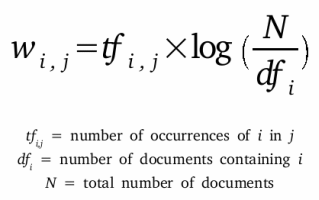

Don't get too scared with this formula! It is actually simple and straightforward. Let's go slowly:

Imagining we want to get the score for the word ```fire``` in our third "document" (document and tweet are two terms that I'm intertwining): ```Forest fire near La Ronge Sask. Canada```

The first part $t,f_i,_j$ is simple in our case, there is only one occurence of word ```fire``` or $i$ in our tweet $j$ so we will multiply the second formula by 1 - our formula is in this state right now:

$1*log \frac{N}{df_i}$

Let's find the other part of our formula - so our number of documents is 10:

$1*log \frac{10}{df_i}$

We only have to find how many of our documents contain the word fire:

In [39]:
tweets.text.head(10).str.contains('fire')

0    False
1     True
2    False
3     True
4     True
5     True
6    False
7     True
8    False
9    False
Name: text, dtype: bool

Five documents contain the word fire! We can now find the `IDF` for the word ```fire``` for our tweet: ```Forest fire near La Ronge Sask. Canada```

$1*log \frac{10}{5}$

In [40]:
import math
1*math.log(10/5)

0.6931471805599453

What happens if we raise the amount of occurences of the word `fire` in our tweet? This would happen in the formula:

In [41]:
import math
5*math.log(10/5)

3.4657359027997265

The tf-idf score would be higher, as expected. What also tweaks the formula a lot is to have few documents with the word we are targeting. <br>
<br>
Example, if instead of 5, we would have only 2 documents with the word ```fire```:

In [42]:
import math
5*math.log(10/2)

8.047189562170502

Our tf-idf score would be much higher! This method basically weighs the rarity and presence of a word in a document vs. the rarity of a word in a corpus. More **rarity in corpus** and **presence in document** will raise the TF-IDF score, less **rarity in corpus** or **presence in document** will lower the TF-IDF score.

Again, we have a really cool `sklearn` implementation that enable us to do a quick implementation of this method:

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
# We can also use min_df here!
tf_idf = TfidfVectorizer(min_df = 0.01)
tf_idf_sparse = tf_idf.fit_transform(tweets.text)

In [45]:
tf_idf_sparse

<7613x150 sparse matrix of type '<class 'numpy.float64'>'
	with 44502 stored elements in Compressed Sparse Row format>

In [47]:
pd.DataFrame(tf_idf_sparse.todense(), columns=tf_idf.get_feature_names_out())

,2015,about,accident,after,all,amp,an,and,are,as,at,attack,back,be,been,being,body,bomb,buildings,burning,but,by,california,can,car,co,could,crash,day,dead,did,disaster,do,don,down,emergency,fire,fires,first,for,from,full,get,go,going,good,got,had,has,have,...,say,see,she,so,some,still,storm,suicide,than,that,the,their,them,then,there,they,think,this,time,to,today,too,train,two,up,us,via,video,want,war,was,watch,way,we,were,what,when,who,why,will,with,world,would,year,years,you,your,youtube,û_,ûªs
0,0.0,0.0,0.0,0.000000,0.363921,0.0,0.000000,0.0,0.330901,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177689,0.0,0.0,0.0,0.0,0.0,0.0,0.314549,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.427706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.312480,0.0,0.000000,0.0,0.568255,0.000000,0.0,0.0,0.0,0.0,0.0,0.388911,0.0,0.0,0.0,0.0,0.0,0.261834,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.177433,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.699960,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.332602,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.616127,0.0,0.0,0.0,0.0,0.0,0.412859,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.298513,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.217353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.707022,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,

The values from the sklearn are normalized (bounded with a maximum 1 value). We skipped this in the step-by-step explanation for simplicity.

TF-IDF also has some downsides, being the main one the fact that is dependent on the distribution of words of the corpus where we are training the data.
<br>
<br>
If your distribution of words change too much, then the `TF-IDF` that you have trained before may be biased and the **IDF** may not represent the real distribution of words in documents.

## 1.4 Doc Vectors

Of course, word vectors will also lend us a hand here!
<br>
<br>
One of the common ways to turn documents into vectors is to average out all the individual token vectors in a sentence. 
<br>
<br>
As we already had a pretty deep dive into word vectors, we are going to use and *off-the-shelf* version here with `spacy`!

In [33]:
import spacy

In [ ]:
# To download spacy md model uncomment the line below
# !python -m spacy download en_core_web_md

In [11]:
nlp = spacy.load("en_core_web_md")

Let's create three sentences that would show similarity in any of the methods above. Testing with `CountVectorizer`:

In [57]:
sentence_1 = 'the capital of Portugal is Lisbon'
sentence_2 = 'Madrid is the capital of a country named Spain'
sentence_3 = 'capital punishment is unlawful in Lisbon, Portugal'

In [58]:
cv = CountVectorizer(binary=False)

In [59]:
cv_sentences = cv.fit_transform([sentence_1, sentence_2, sentence_3])

What's the similarity of these sentences based on `CountVectorizer`?

In [66]:
cosine_similarity(
    cv_sentences
)

array([[1.        , 0.57735027, 0.6172134 ],
       [0.57735027, 1.        , 0.26726124],
       [0.6172134 , 0.26726124, 1.        ]])

Notice that based on `CountVectorizer`, sentence 1 is more similar to sentence 3. This doesn't make sense as the first two sentences refer the same topic (geography).

Now let's use an average of individual word vectors to represent these 3 sentences:

In [67]:
doc_1 = nlp(sentence_1)
doc_2 = nlp(sentence_2)
doc_3 = nlp(sentence_3)

We can acess the average of the vectors of each token by calling the attribute `.vector` on the `spacy` document.

In [70]:
doc_1.vector

array([-3.51373172e+00,  1.47350073e-01,  1.10512161e+00,  1.90870512e+00,
        7.11281538e+00,  1.18967998e+00,  1.00614655e+00,  3.08740163e+00,
        3.77843308e+00, -4.75233555e-01,  9.16955090e+00,  1.20262659e+00,
       -3.08587170e+00,  5.59614718e-01, -1.42707837e+00,  4.23301649e+00,
        6.47193253e-01,  1.54846334e+00, -1.15520489e+00, -2.89542007e+00,
        6.39534473e-01, -2.40576649e+00, -3.32388854e+00,  4.46106672e+00,
        5.44755280e-01, -4.31373358e-01, -1.05547488e+00, -3.04463363e+00,
       -1.81496847e+00,  1.63418663e+00,  1.35784996e+00,  1.37815821e+00,
       -1.75851381e+00, -4.40079165e+00, -3.43027663e+00,  6.96513355e-01,
       -9.74258244e-01,  2.58416629e+00,  8.14683810e-02,  1.52154839e+00,
       -2.15264487e+00,  2.02300000e+00, -1.08441997e+00,  9.08255339e-01,
       -3.01338506e+00,  2.21342850e+00,  2.42038012e+00,  1.10006489e-01,
        2.74733510e-02,  4.18299921e-02, -2.82794023e+00,  2.79177833e+00,
        6.11124992e-01, -

In [71]:
doc_2.vector

array([-3.5648088 ,  1.6828489 , -0.04213786,  1.8699    ,  8.08      ,
        0.8122711 ,  1.6939288 ,  3.804423  ,  4.6773977 ,  0.02576664,
        9.304704  ,  1.760111  , -2.6576264 ,  0.70155114, -1.7967256 ,
        4.0202627 ,  1.627411  ,  1.6785865 , -0.1447178 , -1.5285244 ,
        0.9375177 , -1.0051444 , -2.7934835 ,  3.6698902 ,  1.1655211 ,
       -1.3021933 , -1.9324722 , -3.1558745 , -0.83137333, -0.08174995,
        1.4379523 ,  0.7664654 , -1.3194177 , -4.4141164 , -2.695564  ,
        0.40578327, -1.4138477 ,  1.6400845 ,  0.58466667, -1.05955   ,
       -1.6800221 ,  0.69341445, -0.02335856,  0.6473691 , -2.489752  ,
        1.0095468 ,  1.219231  ,  0.3807922 ,  0.20463   ,  0.48339108,
       -2.4164667 ,  2.5764203 ,  0.39528334, -3.8893144 ,  0.6443045 ,
       -0.43085998,  1.2553477 , -0.8997472 , -0.5041611 , -0.38994673,
        1.4925132 , -2.8365488 ,  1.3092145 , -0.9435914 ,  0.85106665,
        0.55578333, -2.1086333 , -3.2992845 ,  4.8952885 ,  2.01

By the way, want to take a guess what's the number of dimensions of these vectors? 

In [72]:
doc_2.vector.shape

(300,)

Yup, `word2vec`!

Let's see the similarity between the sentences using this vectorization process:

In [73]:
cosine_similarity(
    [doc_1.vector, doc_2.vector]
)

array([[1.0000002 , 0.93299294],
       [0.93299294, 1.0000004 ]], dtype=float32)

In [74]:
cosine_similarity(
    [doc_1.vector, doc_3.vector]
)

array([[1.0000002, 0.8141582],
       [0.8141582, 1.       ]], dtype=float32)

Cool! Now it makes sense, the siilarity between the two sentences is higher than the similarity between the first and third sentence!